In [41]:
import pandas as pd
path = 'data/datasets.csv'
data = pd.read_csv(path)

In [42]:
# 잘 load 되었는지 확인
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [43]:
data.columns, len(data.columns)

(Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
        'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
        'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object'),
 35)

In [44]:
# 파이프라인 
import pandas as pd 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


# === 1. 사용자 정의 매핑 클래스 ===
class ManualMapper(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.mappings = {
            'Attrition' : {"Yes":1, "No":0},
            'OverTime' : {"Yes":1,"No":0},
            'BusinessTravel':{
                'Travel_Rarely': 2, 'Travel_Frequently': 3, 'Non-Travel': 4
            },
            'MaritalStatus' : {'Single': 2, 'Married': 3, 'Divorced': 4},
            'Department': {'Sales': 2, 'Human Resources': 3, 'Research & Development': 4

            },
            'JobRole':{
                'Sales Executive': 2, 'Manufacturing Director': 3, 'Healthcare Representative': 4,
                'Manager': 2, 'Research Director': 3, 'Laboratory Technician': 4,
                'Sales Representative': 2, 'Research Scientist': 3, 'Human Resources': 4
            }
        }

    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        X = X.copy()
        for col,mapping in self.mappings.items():
            if col in X.columns:
                X[col] = X[col].map(mapping)
        return X
    
# === 2. 파이프라인 구성 ===
data["Attrition"]= data["Attrition"].map({'Yes':1, "No":0})
# 제거할 컬럼 
drop_cols = [
        'Over18', 'EmployeeNumber', 'EmployeeCount', 'StandardHours',
    'MonthlyIncome', 'YearsInCurrentRole', 'YearsAtCompany', 'YearsWithCurrManager',
    "TotalWorkingYears", "TrainingTimesLastYear", "DistanceFromHome", "EducationField",
    "MonthlyRate", "HourlyRate", "YearsSinceLastPromotion", "PerformanceRating",
    "PercentSalaryHike", "DailyRate", "Gender"
]

# 전체 파이프라인 
full_pipeline = Pipeline([
    ('manual_mapper',ManualMapper()),
    ('drop_columns',FunctionTransformer(lambda data: data.drop(columns=drop_cols))),
    ('scaling', ColumnTransformer([
        ('minmax',MinMaxScaler(),lambda data:data.drop(columns=['Attrition']).columns)
    ],remainder='drop'))

])

# === 3. 적용 ===
X_processed= full_pipeline.fit_transform(data)

# === 4. 데이터 분리 ===
# processed_data = pd.DataFrame(processed_df,columns=data.drop(columns=drop_cols).columns)
X_columns = data.drop(columns=drop_cols + ["Attrition"]).columns
X = pd.DataFrame(X_processed,columns=X_columns)
Y = data['Attrition']

In [45]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [46]:
# # 무의미한 값 drop
# data = data.drop(['Over18', 'EmployeeNumber','EmployeeCount','StandardHours'],axis=1)
# data = data.drop(['MonthlyIncome' ,'YearsInCurrentRole' , 'YearsAtCompany', 'YearsWithCurrManager'],axis=1)
# top_features = [
#     "TotalWorkingYears",
#     "TrainingTimesLastYear",
#     "DistanceFromHome",
#     "EducationField",
#     "MonthlyRate",
#     "HourlyRate",
#     "YearsSinceLastPromotion",
#     "PerformanceRating",
#     "PercentSalaryHike",
#     "DailyRate",
#     "Gender"
# ]

# data = data.drop(columns=top_features,axis=1)
# len(data.columns)

In [47]:
# data.columns, len(data.columns)

In [48]:
# data['Attrition'] = data['Attrition'].map({'Yes':1,'No':0})
# data['OverTime'] = data['OverTime'].map({'Yes':1,'No':0})
# data['Gender'] = data['Gender'].map({'Male':1,'Female':0})

# data['BusinessTravel'] = data['BusinessTravel'].map({
#     'Travel_Rarely':2,
#     'Travel_Frequently':3,
#     'Non-Travel':4
# })

# data['MaritalStatus'] = data['MaritalStatus'].map({
#     'Single':2,
#     'Married':3,
#     'Divorced':4
# })

# data['Department'] = data['Department'].map({
#     'Sales':2,
#     'Human Resources':3,
#     'Research & Development':4
# })

# data['EducationField'] = data['EducationField'].map({
#     'Life Sciences':2,
#     'Medical':3,
#     'Marketing':4,
#     'Technical Degree':2,
#     'Human Resources':3,
#     'Other': 4
# })

# data['JobRole'] = data['JobRole'].map({
#     'Sales Executive':2,
#     'Manufacturing Director':3,
#     'Healthcare Representative':4,
#     'Manager':2,
#     'Research Director':3,
#     'Laboratory Technician':4,
#     'Sales Representative':2,
#     'Research Scientist':3,
#     'Human Resources':4
# })

In [49]:
# data = data.drop(['MonthlyIncome' ,'YearsInCurrentRole' , 'YearsAtCompany', 'YearsWithCurrManager'],axis=1)

In [50]:
# #normalizing 
# from sklearn import preprocessing
# scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
# DF1 = data.drop(columns=['Attrition'])
# norm = scaler.fit_transform(data)
# norm_df = pd.DataFrame(norm,columns=data.columns)

In [51]:
# X = pd.DataFrame(norm_df.drop(columns='Attrition'))
# Y = pd.DataFrame(norm_df.Attrition).values.reshape(-1, 1)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split (X ,Y ,test_size = 0.2, random_state = 0)

In [53]:
y_test

442     0
1091    0
981     1
785     0
1332    1
       ..
1439    0
481     0
124     1
198     0
1229    0
Name: Attrition, Length: 294, dtype: int64

In [54]:
#SMOTE
from imblearn.over_sampling import SMOTE

oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(X_train,y_train)

In [55]:
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [56]:
#### XGBoost classifier

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

best_acc = 0.0
best_clf = None
best_model_name = ""
best_params = {}
scoring_list = ['accuracy','recall','f1']
scoring = scoring_list[0]

import numpy as np

xgb_clf = XGBClassifier()
xgb_clf.fit(smote_train, smote_target)

y_pred = xgb_clf.predict(X_test)
print('accuracy',metrics.accuracy_score(y_test, y_pred))

import pickle
with open('xgb.pkl','wb') as f:
    pickle.dump(xgb_clf,f)

accuracy 0.9829931972789115


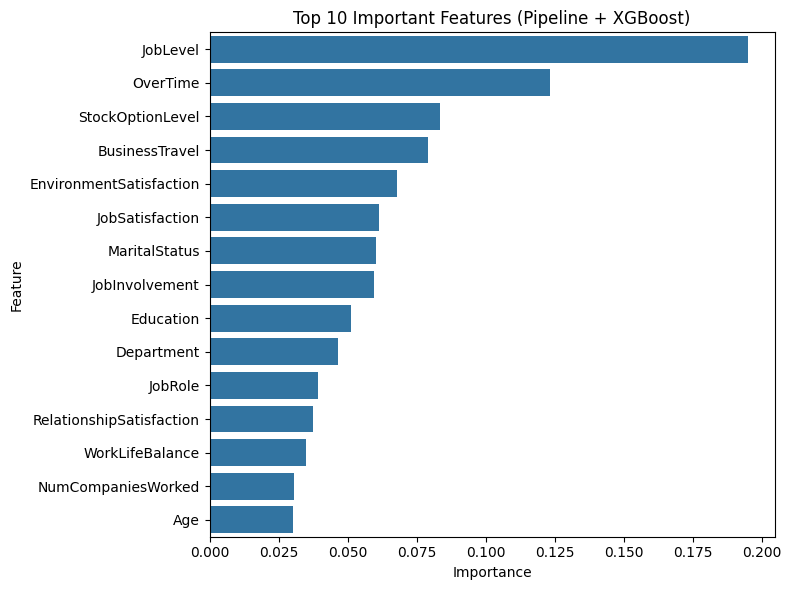

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# 5. feature importance
importances = xgb_clf.feature_importances_

# 4. 중요도 매핑
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# 5. 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=coef_df)
plt.title("Top 10 Important Features (Pipeline + XGBoost)")
plt.savefig("pipeline+xgb.png")
plt.tight_layout()
plt.show()

In [58]:
len(coef_df)

15

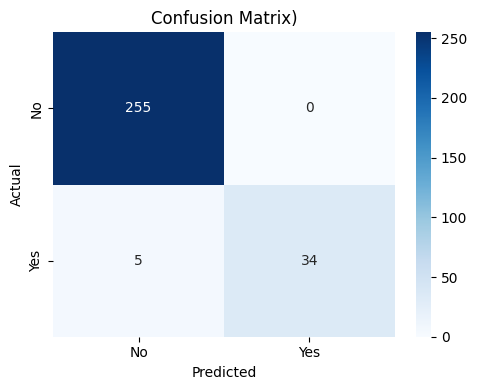

In [59]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve
)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix)")
plt.tight_layout()
plt.show()